<img src="udea.png">

<div style="text-align: center;">
  <h1>ANALÍTICA DE DATOS Y MACHINE LEARNING APLICADO A LAS CIENCIAS POLÍTICAS</h1>
</div>

## Ruta de trabajo de un proyecto de Machine Learning:

### Repositorios de datos abiertos:

1. __Repositorios populares:__

- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon’s AWS datasets](https://registry.opendata.aws/)

2. __Metaportales:__ contienen links a repositorios externos

- [DataPortals](http://dataportals.org)
- [OpenDataMonitor](http://opendatamonitor.eu)
- [Quandl](quandl.com)

3. Repositorios colombianos:

- [Dato abiertos](https://www.datos.gov.co/)
- [MEDATA](https://medata.gov.co/)
- [DANE](https://www.dane.gov.co/index.php/estadisticas-por-tema)

5. __Otras páginas:__ contienen otros repositorios populares:

- [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
- [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
- [Reddit](https://www.reddit.com/r/datasets/)

### Ejemplo sencillo de modelo de regresión:

**¿El dinero hace feliz a la gente?** ... Intentemos responder esto desde los datos:

- **Better life index (Índice para una vida mejor)**. Fuente: OCDE.
- **PIB Per Capita**. Fuente: FMI.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [7]:
# Géron ya tiene los datos reunidos, descarguemoslo desde su página web:


data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

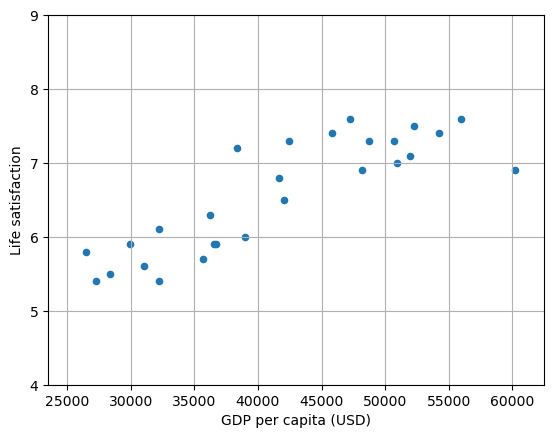

In [8]:
# Miremos los datos:

lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [9]:
lifesat.shape

(27, 3)

In [10]:
lifesat.columns

Index(['Country', 'GDP per capita (USD)', 'Life satisfaction'], dtype='object')

In [11]:
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


Un modelo simple puede ser entonces:

$$
\text{Satisfaccion\_vida} = \theta_0 + \theta_1 \times \text{PIB\_per\_capita}
$$

En la que la satisfacción con la vida está en función del PIB Per Capita.

Miremos como se entrenaría este modelo con Scikit-Learn:


In [13]:
# Modelo lineal:

model = LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression()

In [15]:
print("Coefficients:", model.coef_)

Coefficients: [[6.77889969e-05]]


In [16]:
print("Intercept:", model.intercept_)

Intercept: [3.74904943]


In [17]:
y_pred = model.predict(X)

theta_0 = round(model.intercept_.item(), 2)
theta_1 = round(model.coef_[0].item(), 5)

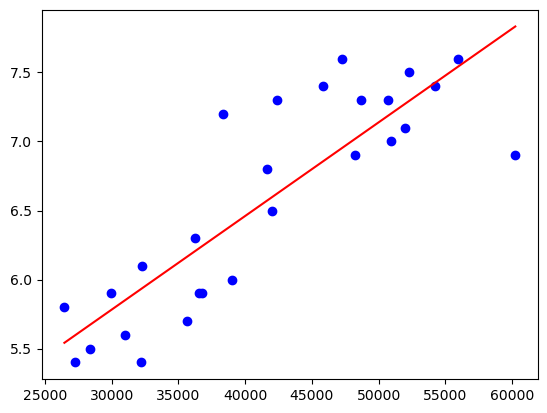

In [18]:
sort_idx = np.argsort(X.flatten())
plt.scatter(X, y, color="blue")
plt.plot(X[sort_idx], y_pred[sort_idx], color="red")
plt.show()

In [19]:
print(f"Ecuación: Y = {theta_0} + {theta_1}*Pib_pp")

Ecuación: Y = 3.75 + 7e-05*Pib_pp


Con esta ecuación ya podemos predecir el nivel de _satisfacción de vida_ para cualquier país siempre que tengamos su PIB Per Capita:

In [21]:
# Hagamos una predicción para Chipre:
X_new = [[32_000]]  

print(model.predict(X_new)) 

[[5.91829733]]


Con los datos disponibles, ¿tiene sentido hacerlo para Colombia?

In [23]:
# Hagamos una predicción para Colombia
X_new2 = [[7_900]]  
print(model.predict(X_new2)) 

[[4.2845825]]


In [24]:
# Pueden existir otros modelos predictivos:

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Entrenar el modelo:
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# Realicemos nuevamente la predicción para Chipre y para Colombia:
print(model.predict(X_new))
print(model.predict(X_new2)) 

[[5.7]]
[[5.56666667]]


In [26]:
lifesat.sort_values(by="GDP per capita (USD)", ascending=False)

,Country,GDP per capita (USD),Life satisfaction
26,United States,60235.728492,6.9
25,Denmark,55938.212809,7.6
24,Netherlands,54209.563836,7.4
23,Iceland,52279.728851,7.5
22,Austria,51935.603862,7.1
21,Germany,50922.358023,7.0
20,Sweden,50683.323510,7.3
19,Australia,48697.837028,7.3
18,Belgium,48210.033111,6.9
17,Finland,47260.800458,7.6


Esta clase seguiremos a Gerón (2020) quien usa una base de datos de los **Precios de vivienda en California** que se encuentra en el repositorio _StatLib_. Esta base corresponde a información del censo de 1990 en Californi (no es reciente) pero tiene mucha cualidades y variables que la hacen idónea para el aprendizaje.

Nos piden crear un modelo que estime el precio de las casas en California, basados en la información disponible tales como:

- Población.
- Ingresos promedio.
- Precio promedio de una casa.

Entre otras variables, esta información se tiene por manzanas o distritos.

### ¿Qué haremos hoy?: conoceremos el flujo de trabajo en Machine Learning:

1. Definir el Problema – Comprender objetivos y traducirlos a una tarea de ML.
2. Seleccionar Métrica de Desempeño – Elegir RMSE, precisión, etc.
3. Obtener los Datos – Descargar o recolectar datasets.
4. Crear División Entrenamiento/Prueba – Muestreo aleatorio o estratificado.
5. Explorar y Visualizar – Usar histogramas, mapas de correlación, gráficos.
6. Preparar los Datos – Tratar valores faltantes, escalar, codificar categorías.
7. Construir Pipelines – Automatizar preprocesamiento con Scikit-Learn.
8. Entrenar Modelos – Probar regresión lineal, árboles de decisión, Random Forest.
9. Validar con Cross-Validation – Usar validación cruzada k-fold.
10. Ajustar Hiperparámetros – Con GridSearchCV o RandomizedSearchCV.
11. Evaluar en el Set de Prueba – Medir rendimiento final e intervalo de confianza.
12. Desplegar y Monitorear – Guardar modelo y supervisar su desempeño.

### Enmarcar el problema:

¿Cuál es el __objetivo__? No es crear el modelo, es lo que quiero hacer con este. La __pregunta__ es lo que determina la información disponible y el modelo a utilizar.

A veces el output de un modelo de machine learning, puede ser el input de otro modelo. Por ejemplo, en este caso, la predicción del precio, junto con otras variables serán usadas para decidir si vale la pena invertir o no en un área específica.

### ¿Cómo elegir el modelo a utilizar según mi información disponible?: Scikit-Learn algorithm cheat sheet

<img src="ml_map.svg">

### Volvamos al problema: 

¿Un modelo que predice el precio de viviendas en función de sus características de que tipo es? 

¿Supervisado, no supervisado o aprendizaje reforzado?

¿Es de clasificación o de regresión?

### Seleccionar el estadístico de desempeño

¿Recuerdan los que vimos para el modelo de regresión? En este caso usaremos la __Raíz del Error Cuadrático Medio (RMSE)__, que estima el porcentaje de error de cada predicción, dándole mayor importancia a los errores más grandes. Entonces, al comparar modelos, el que tenga un menor RMSE será el modelo que mejor ajuste.

$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2}
$$

Si el modelo tiene muchos datos atípicos ¿Cómo vemos los datos atípicos?, podemos usar el __Error Cuadrático Medio (MSE)__ que no es tan sensible a los datos atípicos. Su intepretación es la misma que para el RMSE.

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

### Primer paso: importar los datos:

Hay una etapa previa en todo proceso de análisis de datos y es conseguir la información. Si el objetivo es aprender análisis exploratorio de datos, modelos de estadística inferencial o machine learning, existen repositorio con información ya depurada (como algunos de los presentados arriba). En otros casos, toca llevar a cabo un exhaustivo proceso de búsqueda de información, reformulación de métodos y de relaciones según la información disponible.

En este caso es más simple, se nos ofrece directamente la base de datos, la cual vamos a descargar a través de una función que nos propociona Géron:

In [35]:
# Importamos los paquetes:

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [36]:
# Definimos la función para cargar los datos:

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [37]:
housing = load_housing_data()

#### Miremos algunas características de los datos

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
# El comando info ofrece una descripción de la información disponible: filass, columnas, tipos de datos:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Hay 10 columnas (el conteo inicia en cero) y 20640 filas o registros de manzanas. 

La variable _total de habitaciones_ tiene alguno datos missing ... ¿Qué haremos con esto?

La única variable tipo _objeto_ es Proximidad al océano. Miremos que tipo de datos tiene, deben ser tipo texto ya que provienen de un archivo CSV.

In [42]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Miremos una estadística descriptiva de las variables:

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Miremos ahora gráficamente que puede intuirse:

El comando _hist_ realiza un histograma para todas las variables numéricas, unas de estas no tendrán interpretación.

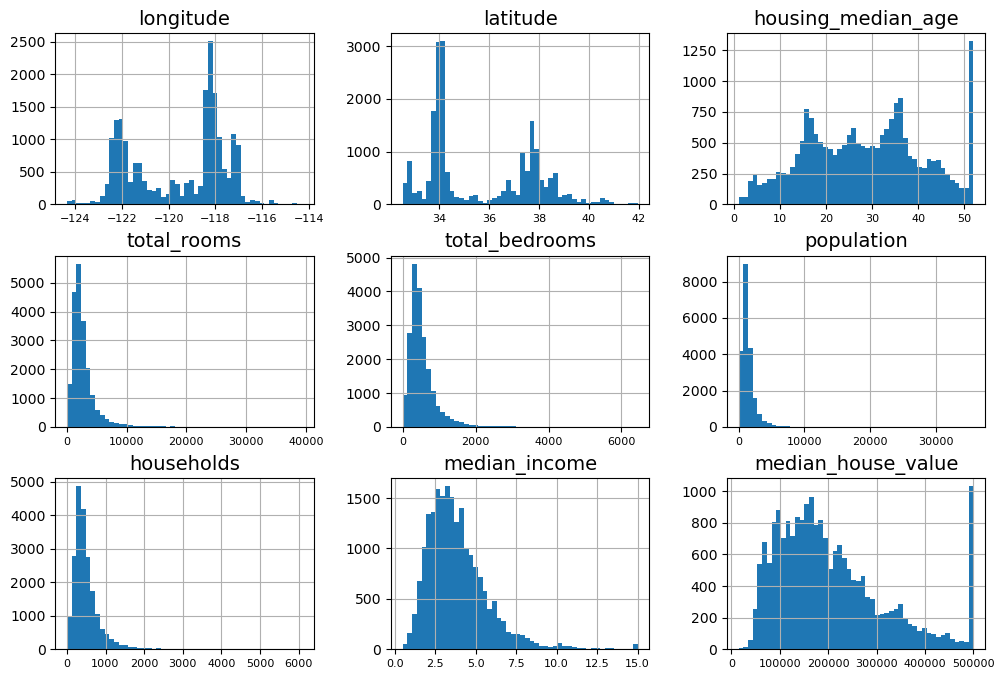

In [46]:
import matplotlib.pyplot as plt

# Con estas líneas definimos los tamaños de las letras:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

### ¿Qué podemos interpretar en estos histogramas?

<details>
<summary><b>Mostrar posibles interpretaciones</b></summary>

1. Los ingresos medios no parece estar expresado en dólares estadounidenses (USD). Tras consultar con el equipo que recopiló los datos, se le informa que los datos se han escalado y limitado a 15 (en realidad, 15,0001) para ingresos medios más altos, y a 0,5 (en realidad, 0,4999) para ingresos medios más bajos. Las cifras representan aproximadamente decenas de miles de dólares (por ejemplo, 3 en realidad significa unos 30 000 USD).
   
2. La edad media de las viviendas y el valor medio de las mismas también se limitaron. Esto último puede ser un problema grave, ya que es su atributo objetivo (sus etiquetas). Sus algoritmos de aprendizaje automático podrían aprender que los precios nunca superan ese límite. Debe consultar con su equipo cliente (el equipo que utilizará los resultados de su sistema) para determinar si esto representa un problema. Si le indican que necesitan predicciones precisas, incluso superiores a 500.000 $, tiene principalmente dos opciones:

- Recolectar las etiquetas adecuadas para las manzanas que fueron limitadas.
- Remover esas manzanas del conjunto de datos para no afectar las medidas de precisión del modelo.

3. Los datos tienen escalas muy diferentes, ya veremos esto como afecta las estimaciones y como podemos solucionarlo.

4. Por último, muchos histogramas tienen __colas pesadas__, esto puede afectar la capacidad de los modelos de Machine Learning de detectar patrones. Más adelante transformaremos estos atributos (variables) en distribuciones de tipo normal.
</details>

### Creemos un set de prueba: ¿Para qué?

Con el fin de evitar la incorporación de sesgos sobre nuestras elecciones del modelo y sobre las intepretaciones de resultados, es conveniente separar la base de prueba antes de profundizar más en los análisis. Esto nos permitirá evaluar el modelo resultante de forma más "objetiva" y tener mayor confianza en sus capacidades de predicción y de generalización a datos no conocidos.

Crear un conjunto de prueba es muy sencillo, elegimos un porcentaje de la base de datos al azar, usualmente el 20 % (o menos si tenemos muchos datos) y los dejamos a un lado.

#### Primera opción: barajar la base y dividir en base de entrenamiento y de prueba:

In [50]:
# Quizás el orden de los datos tiene algún sentido: las manzanas se registraron de norte a sur, occidente a oriente
# Quizás se ordenaron por número de habitantes, precio promedio de las viviendas, etc.
# Es necesario entonces "desordenar" o "barajar" los datos.

import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [51]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [52]:
len(test_set)

4128



<details>
<summary><b>¿Cuál es el problema con esto?</b></summary>

Si cerramos la sesión y después volvemos a ejecutar este Notebook, la repartición de los datos entre la **base de entrenamiento** y la **base de prueba** será diferente. Eventualmente, la investigadora o el algoritmo de Machine Learning conocerá todo el conjunto de datos: **Esto es precisamente lo que queremos evitar**

</details>

Una solución es definir una semilla aleatoria antes de realizar la distribución de los datos entre bases, coon el siguiente comando, esto garantiza que la distribución de los índices será iguale entre distinas repeticiones del Notebook. Esto garantiza:

- Reproducibilidad de resultados.
- Deepuración de modelos.
- Compartir códigos con otro investigadores sin inconsistencias.

In [55]:
np.random.seed(42)

**Si se actualiza la base de datos**, esta solución pierde validez. ¿Qué hacemos entonces?

Una solución propuesta es crear indicadores únicos para cada registro, pueden ser códigos o números. Si entran nuevas instancias tendrán su propio código único. Después de esto, implementar un código que divida los registros previos en los grupos de entrenamiento y control ya definidos. Mientras que **las nuevas observaciones** se distribuirán en estos grupos.

Esto impide que datos que hayan estado en el grupo de prueba pasen al grupo de entrenamiento y viceversa:

In [57]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

En este caso, se creó una función que a partir de una columna identificadora tipo ID, baraja la base de dato y la distribuye entre base de entrenamiento y prueba:

**¿Qué pasa si no tenemos una columna identificadora?**, podemos crearla con la siguiente función:

In [59]:
housing_with_id = housing.reset_index() # Crear un índice ...

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index") # Dividir entre base de ent. y prueba

También podemos crear el identificador como la combinación de variables únicas:

In [61]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

Afortunadamente, **Scikit-Learn** no proporciona unas cuantas funciones que pueden dividir un conjunto de datos en varios subconjuntos. La forma más simple es la siguiente. Como ya vimos los anteriores códigos, podemos entender que hace este:

In [63]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Miremos como la semilla, aunque aleatoriza, preserva el conjunto de datos. Para el _estado aleatorio_ 42, el número de datos faltantes de total de habitaciones es **44**. ¿Qué pasa si cambiamos el _random_state_ a otro número? ¿Si después volvemos al original? 

In [65]:
test_set["total_bedrooms"].isnull().sum()

44

### Datos estratificados:

Hasta ahora vimos como aleatorizar datos de forma absoluta. Pero ¿Qué pasa si necesitamos los datos __estratificados__?

Por ejemplo, si tenemos que seleccionar aleatoriamente a 1000 personas (hombres y mujeres) de una población en la que el **48.9 %** son hombres y el **51.1%** son mujeres, podemos calcular la probabilidad de que la muestra seleccionada no represente a la población, esto a través de un método de probabilidad conocido como el _binomial_:

Supuestos:

- **Población:** 1.000.000
- **Hombres:** 489.000
- **Mujeres:** 511.000

Querríamos tener:
- **Hombres:** 489
- **Mujeres:** 511

¿Cuál es la probabilidad de tener menos de 490 (49 %) o más de 540 mujeres (54 %) en la muestra?

In [67]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(490 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(540)
print(round(proba_too_small + proba_too_large,2)*100, "%")

12.0 %


Es una probabilidad nada desdeñable de tener una muestra sesgada. ¿Qué pasa si tenemos una variable que es muy importante para el análisis y no la queremos sesgada? Es decir __Queremos que los datos de prueba sean representativos de todas las categorías de la variable o atributo__. 

Consideremos el caso del ingreso medio, quiero que sea representativo de todos los tipos de ingreso de la muestra para capturar gente con bajos, medios y altos ingresos. Cómo el __promedio de ingreso__ es una variable numérica continua, necesitamos crear una variable categórica que distribuya los datos en __n__ categorías dadas.

Afortunadamente, con Python podemos hacer esto de forma automática:

In [69]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

**¿Por qué no asignamos valores tipo texto?** Tipo: ingresos muy bajos, bajos, medios, altos, superiores.

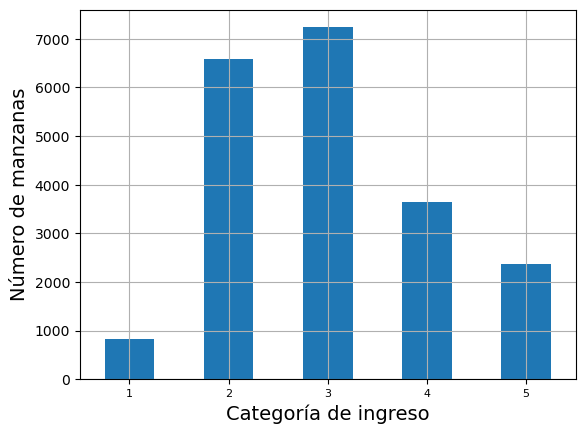

In [71]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Categoría de ingreso")
plt.ylabel("Número de manzanas")
plt.show()

**Nuevamente:** Scikit-Learn lo hace mejor. Este es el código para barajar automáticamente y estratificando basados en una categoría dada:

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [74]:
strat_train_set, strat_test_set = strat_splits[0]

In [75]:
# Esta es otra forma de implementar esto:

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

Miremos ahora como se distribuye la muestra por categoría de ingresos:

In [77]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Comparemos esto con la distribución de la variable __income_cat__ en la base general:

In [79]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Se acerca bastante, ¿No?

Ahora el autor nos proporciona una función que permite comparar como se distribuyen los datos entre categorías de ingresos para la población, la muestra estratificada y la muestra aleatoria:

In [81]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Promedio %": income_cat_proportions(housing),
    "Estratificado %": income_cat_proportions(strat_test_set),
    "Aleatorio %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Estratificado %"] /
                                   compare_props["Promedio %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Aleatorio %"] /
                                  compare_props["Promedio %"] - 1)
(compare_props * 100).round(2)

,Promedio %,Estratificado %,Aleatorio %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Ahora que tenemos la base aleatorizada, eliminamos la variable de categoría puesto que ya no la necesitamos:

In [83]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Segundo paso: visualizar los datos para ganar perspectivas:

Hasta ahora sólo hemos visto los estadísticos de los datos para entender un poco su distribución y comportamiento. Los gráficos nos permiten hacer esto con mayor profundidad. Miremos como se hace esto con técnicas de Machine Learning.

**Primero:** debemos estar **seguros**, **absolutamente seguros** de que dejamos de lado la *base de prueba* y que sólo vamos a explorar la _base de entrenamiento_. **¿Recuerdan por qué?**

Si la base de entrenamiento es muy grande, podemos explorar una submuestra de esta base para que no se tome tanto tiempo la ejecución de los códigos.

In [86]:
# ¿Qué pasa cuando intentamos crear un gráfico de dispersión de 1 millón de datos?

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(0, 1, 10_000_000)
y = 2 * x + np.random.normal(0, 1, 10_000_000)

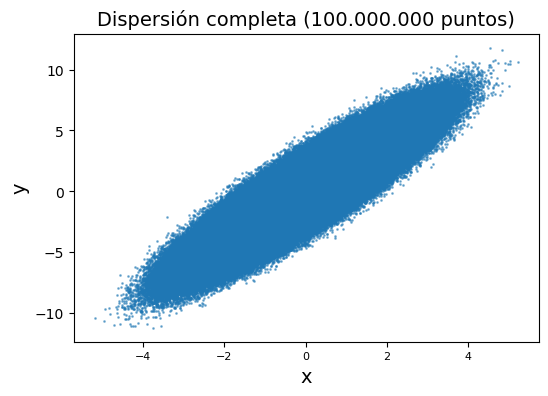

Tiempo de ejecución: 12.228 segundos


In [87]:
import time

t0 = time.perf_counter()

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=1, alpha=0.5)
plt.title("Dispersión completa (100.000.000 puntos)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

t1 = time.perf_counter()
print(f"Tiempo de ejecución: {t1 - t0:.3f} segundos")


In [88]:
# Muestra aleatoria (sin reemplazo):

idx = np.random.choice(len(x), 100_000, replace=False)
x_sample = x[idx]
y_sample = y[idx]


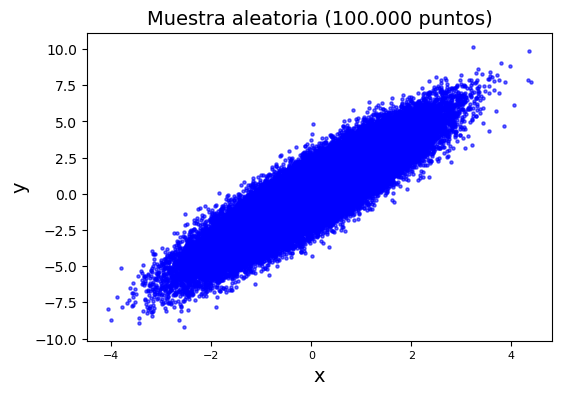

Tiempo de ejecución: 0.525 segundos


In [89]:
t0 = time.perf_counter()

plt.figure(figsize=(6, 4))
plt.scatter(x_sample, y_sample, s=5, alpha=0.6, color="blue")
plt.title("Muestra aleatoria (100.000 puntos)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Tiempo de ejecución: {time.perf_counter() - t0:.3f} segundos")


In [90]:
corr_full = np.corrcoef(x, y)[0, 1]

corr_sample = np.corrcoef(x_sample, y_sample)[0, 1]

print(f"Correlación en todos los datos (10M): {corr_full:.3f}")
print(f"Correlación en la muestra (100k): {corr_sample:.3f}")
print(f"Diferencia absoluta: {abs(corr_full - corr_sample):.4f}")

Correlación en todos los datos (10M): 0.894
Correlación en la muestra (100k): 0.895
Diferencia absoluta: 0.0001


En este caso la muestra no es tan grande entonces no debemos preocuparnos por eso:

In [92]:
housing.shape

(20640, 11)

Ahora sí, creemos una copia de la base de entrenamiento estratificada:

In [94]:
housing = strat_train_set.copy()

In [95]:
housing.shape

(16512, 10)

In [96]:
20640*.8

16512.0

Examinemos los datos geográficos:

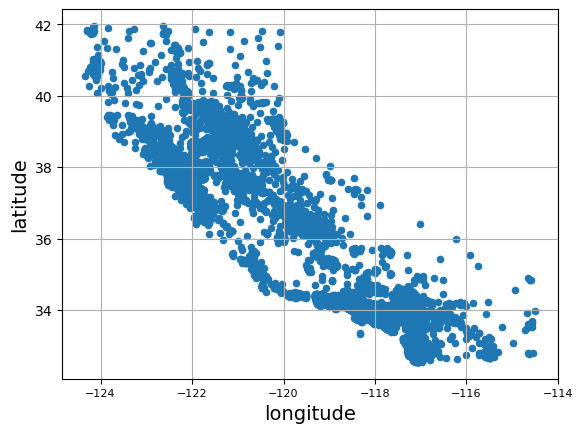

In [98]:
# Este gráfico no es tan bueno, pero permite vislumbrar algo:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

<img src="california.jpg" width="500">


Se parece un poco a California, pero podría mostrar aún más información. La opción **alpha** nos permitiría ver por ejemplo aquellos lugares con gran densidad de puntos:

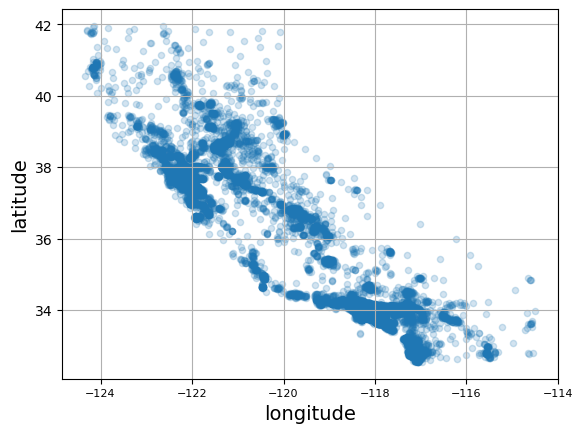

In [101]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

<details>
<summary><b>¿Qué podemos ver ahora?</b></summary>

Las **áreas de mayor densidad** que corresponden a aquellos lugares cerca al mar y en las partes centrales del Estado: Sacramento y Fresno.

</details>

Pero se puede mejorar aún más, por ejemplo, combinando variables:

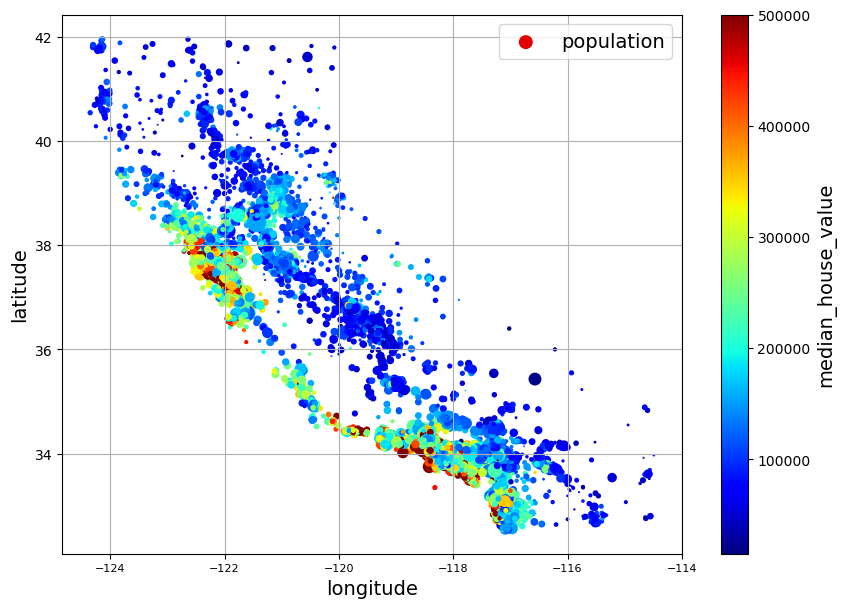

In [104]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

**¿Qué nos dice esta imagen?**

1. Acerca del precio promedio de la casa.
2. Acerca de la población.

In [106]:
# pip install folium

**Nota:** Quitar signos numerales para ejecutar código.

In [108]:
#import folium


#m = folium.Map(location=[housing["latitude"].mean(), housing["longitude"].mean()], zoom_start=8)


#for _, row in housing.iterrows():
#    folium.CircleMarker(
#        location=[row["latitude"], row["longitude"]],
#        radius=row["population"]/1000,
#        color=None,
#        fill=True,
#        fill_color="blue",
#        fill_opacity=0.5
#    ).add_to(m)

# m


### Tercer paso: examinar las correlaciones

Cómo la base de datos no es muy grande, tiene 11 variables, podemos ver esto en una tabla:

In [110]:
# Recuerden que la correlación se da sólo entre variables numéricas:

corr_matrix = housing.corr(numeric_only=True)

In [111]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

**¿Cómo interpretamos estas correlaciones?**

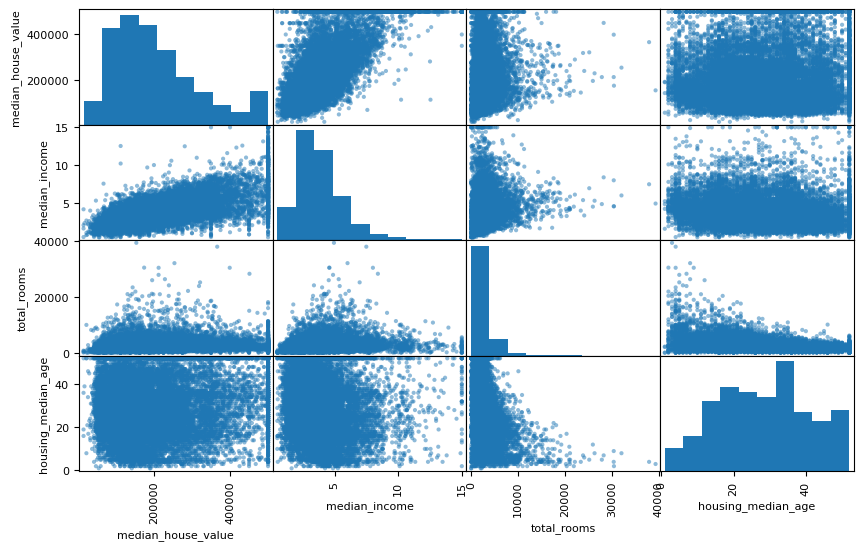

In [113]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
axes=scatter_matrix(housing[attributes], figsize=(10, 6))

for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.set_title(ax.get_title(), fontsize=8)
    
plt.show()

## Interpretemos este gráfico:

- ¿Qué hay en su diagonal?
- ¿Qué hay en sus otros cuadros?

Recordemos que otras columnas tiene la base:

In [116]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [117]:
corr_matrix["longitude"].sort_values(ascending=False)

longitude             1.000000
population            0.104236
total_bedrooms        0.068210
households            0.054261
total_rooms           0.044558
median_income        -0.016542
median_house_value   -0.050859
housing_median_age   -0.102937
latitude             -0.924213
Name: longitude, dtype: float64

Volviendo a la correlación de __valor promedio de la casa__ ... ¿Con cual variable parece que tiene la correlación más fuerte?

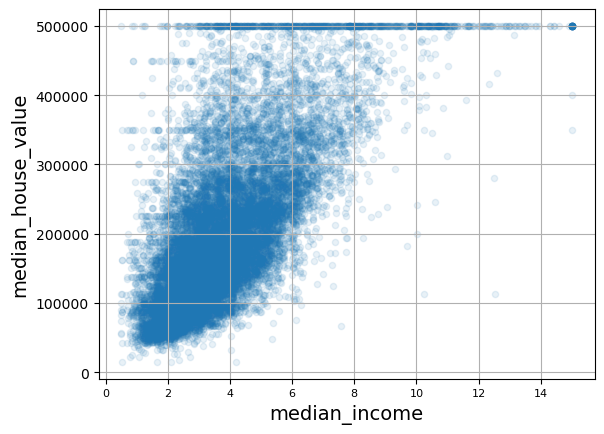

In [119]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

<details>
<summary><b>Este gráfico nos muestra varias cosas, ¿cuáles?</b></summary>

1. La correlación es muy fuerte: tendencia positiva y los datos no están muy dispersos.
2. Hay un precio tope que se ubica aproximadamente en **500000** dólares.
3. Pero se alcanza a ver algo no muy evidente: líneas horizontales en 450 mil dólares y 350 mil dólares. Debemos hacer algo con las manzanas que tienen estos datos por que el modelo podría aprender a reproducir estas "particularidades".

</details>

### Paso 4: Experimentando con la combinación de atributos

Repasemos todo lo que hemo hecho: explorado los datos, identificado particularidades en los datos, encontramo correlaciones entre atributos interesantes ... en particular, las que más no interesan son aquellas con la variable atributo, respuesta, dependiente, Y. En los primeros histogramas también vimos que algunos gráficos tienen colas pesadas ... ¿Qué podemos hacer con estos datos de colas pesadas? **Tranformarlos**, ahora veremos como.

La última cosa que podemos hacer antes de prepararnos para aplicar algoritmos de Machine Learning es ensayar combinanciones de variables atributos. Recordemos primero las variables de la base:

In [123]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**¿Qué opinan de estas variables?**

- Latitud.
- Longitud.
- Edad promedio de la casa por manzana.
- Total de habitaciones por manzana.
- Total de dormitorios por manzana.
- Población por manzana.
- Número de viviendas por manzana.
- Ingreso promedio por manzana.
- Valor promedio de la casa.
- Proximidad al océano de la manzana.


Recuerden el objetivo de esta investigación: **Encontrar un modelo que me permita predecir el valor de una casa en función de una o más características**

¿De estas cuales parecen ser más irrelevantes?

<details>
<summary><b>¿De estas cuales parecen ser más irrelevantes?</b></summary>

1. Habitaciones por manzana.
2. Dormitorios por manzana.
3. Población por manzana.

</details>

**¿Que variables podríamos crear con estas y que nos expliquen mejor el precio de una casa?**

In [127]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] # Habitaciones por casa
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] # Ratio de dormitorios por casa
housing["people_per_house"] = housing["population"] / housing["households"] # Personas por casa

Miremos la matriz de correlaciones con esta variables:

In [129]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

Parece que el ratio de **dormitorios por casa** tiene más relación con el precio de la casa que dormitorios por manzana.

Este proceso no tiene porque ser exhaustivo, pero si desde la teoría conocemos transformaciones de variables que puedan incidir en la variable objetivo, podremos explorar esta relación.

### Paso 5: Ahora sí ... preparar los datos para aplicar Machine Learning

__¿Qué hacer?:__ lo primero es volver a la base de entrenamiento original (strat_train_set) ...

__Después:__ Separar la columna de etiquetas u objetivos de la de las predictoras o características ... no queremos aplicar por error transformaciones a las primeras.

__¿Cómo lo hacemos?:__

In [133]:
housing = strat_train_set.drop("median_house_value", axis=1) # Creamos la copia sin la etiqueta.


housing_labels = strat_train_set["median_house_value"].copy() # Creamos la copia de la etiqueta.

### Limpieza de datos:

#### Datos faltantes:

Recordemos que tenemos datos faltantes en el total de habitaciones:

In [135]:
housing["total_bedrooms"].isnull().sum()

168

In [136]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


Muchos algoritmos de Machine Learning no funcionan si la base tiene datos faltantes, entonces debemos solucionar esto antes de crear el algoritmo. Hay tres formas de hacerlo:

<details>
<summary><b>Por 0.5 en la nota de participación: ¿Cuáles son las tres formas?</b></summary>

1. Eliminar las manzanas con datos faltantes.
2. Eliminar toda la variable con datos faltantes.
3. Ajustar los valores a algún atributo: cero, la media, la mediana, etc.

</details>

Manualmente podríamos hacerlo de la siguiente manera:

In [140]:
# Método 1:

housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [141]:
# Método 2:

housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [142]:
# Método 3:

housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"] = housing_option3["total_bedrooms"].fillna(median)


housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


Escojamos la __opción 3__. En este caso usamos la _media_ del total de habitaciones de la __base de entrenamiento__ y la usamos para completar los valores faltantes. Por lo tanto __DEBEMOS__ guardar este valor (la media) para reemplazar también los valores faltantes de la base de prueba, y en esta misma base cuando se actualice con datos nuevos.

In [144]:
housing["total_bedrooms"].median()

434.0

**Scikit-Learn** nos proporciona una función que se encargan de los valores faltantes: _SimpleImputer_. Miremos como funciona:

In [146]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [147]:
housing_num = housing.select_dtypes(include=[np.number])

In [148]:
imputer.fit(housing_num) # El output se llama docstring.

SimpleImputer(strategy='median')

Veamos que contiene la media de cada atributo:

In [150]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [151]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Transformemos la base de datos:

In [153]:
X = imputer.transform(housing_num)

In [154]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

Pero el resultado es una matriz de Numpy que contiene las características transformadas. Debemos convertirlo nuevamente en DataFrame:

In [156]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [157]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [158]:
imputer.strategy

'median'

#### Datos atípicos:

Scikit-Learn tiene una función llamada _IsolationForest_ la cual calcula los datos atípicos (con todo el conjunto de variables):

In [160]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [161]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

Los datos que tengan valor -1 son atípicos, los que tienven valor 1 son normales. Si queremos eliminar los atípicos lo podemos hacer con el siguiente código:

In [163]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Clase: 15-10-2025:

Hasta acá habíamos avanzado la clase anterior. ¿Qué habíamos visto?:

### 1. Mirar el panorama general:

Se define el problema y su contexto: un modelo para predecir precios de vivienda en California usando datos censales. En este caso se:

- **Formula la pregunta de investigación:**

**a.** Objetivo: Predecir $y$ para apoyar la decisión $Z$ en el proceso $W$.

**b.** Usuarios: ¿Quién lo usará?

**c.** Frecuencia: ¿Cada cuanto se usará (batch, streaming)?


- **Identifica el tipo de aprendizaje y el tipo de modelo:**

**a.** Salida (label): ¿Qué variable predice?

**b.** Entradas (features): ¿Cuáles variables son las predictoras?

**c.** Granularidad: ¿Cuál es la unidad de análisis?

**d.** Tipo de aprendizaje: ¿Los datos están etiquetados?

**e.** Tarea a realizar: ¿se quiere predecir un valor continuo o una categoría?

**f.** Esquema de aprendizaje: ¿Será batch u online?

- **Se elige la métrica de desempeño (RMSE o MAE):**

**a.** RSME: si se desean penalizar los errores más grandes.

**b.** MAE: si hay muchos outliers en el modelo.

**c.** Pruebas de robustez: puedes crear métricas propias de desempeño:

    - % de predicción con error relativo < $x$ %.
    - Error por subgrupos.

- **Se verifican los supuestos del modelo:**
  
**a.** ¿Realmente se necesitan precios y no categorías?
  
**b.** ¿Las etiquetas son correctas y están disponibles?

**c.** ¿Los datos cubren bien la población que se desea modelar?

**d.** ¿Hay valores tope? ¿Qué se hará con ellos?

### 2. Buscar los datos:

- **Crear el espacio de trabajo:**

**a.** Instalar las librerías necesaria `NumPy`, `Pandas`, `MatplotLib`, `Scikit-Learn.`

**b.** Crear una carpeta de trabajo: en esta se alojan todos los archivos. `~/ml/curso_2025`

- **Descargar los datos:** ya sea de un repositorio en línea o buscándolo en sitios institucionales.

- **Mirar la estructura de los datos:**

**a.** Usar `info()` para revisar tipos de variables y valores nulos.

**b.** Usar `describe()` para ver las medidas estadísticas básicas.

**c.** Revisar las primeras filas con `head()` para entender su formato.

**d.** Revisar las últimas fila con `tail()` para verificar que la base haya importado bien.

- **Crear una base de prueba:**

**a.** Separar aproximadamente un **20 %** de los datos como base de prueba (test set).

**b.** Hacerlo antes de explorar los datos para evitar el sesgo por *espionaje de datos* (data snooping).

**c.** Debe hacerse **aleatoriamente**, si hay una variable importante se recomienda **estratificar** por esa variable usando `StratifiedSuffleSplit`.


### 3. Analizar y visualizar los datos para obtener una perspectiva:

- **Visualizar datos geográficos (opcional):**

**a.** Usar gráfico de dispersión con `longitud` y `latitud` para ver el patrón espacial de los datos.

**b.** Usar tamaños y colores para representar múltiple información en un sólo gráfico.

**c.** Mejorar con la capa de Google Street.

- **Buscar correlaciones:**

**a.** Calcular la matriz de correlaciones `corr()` y buscar las variables _features_ más relacionadas con la variable dependiente _label_.

**b.** Usar diagramas de dispersión `scatter_matrix` para inspeccionar la relación entre las variables seleccionadas.

- **Experimentar con combinaciones de atributos:** Examinar si es posible crear nuevas variables derivadas.

**a.** Examinar la corelacción de las nuevas variables con la variable objtivo para ver si mejora la señal predictiva.

### 4. Preparar los datos para el algoritmo de Machine Learning:

- **Limpieza de datos:**

**a.** ¿Qué hacer con los datos faltantes? `SimpleImputer(strategy="median")`

**b.** Posible eliminación de filas o columnass incompletas. Aunque es preferible imputar.

- **¿Qué hacer con los datos categóricos o tipo texto?:**

**a.** Si es **ordinal**: convertir a categórica dando una ordenación y posteriormente a numérica `Ordinalncoder`.

**b.** Si es **nominal** (también puede hacerse con ordinales): convertir en variables binarias o _dummys_ `OneHotEncoder`.

- **Transformadores personalizados (custom transformers):**

**a.** Definir una clase Python para crear atributos combinados automáticamente (`CombinedAttributesAdder`).

- **Escalamiento de características (feature scaling):**

**a.** Normalizar o estandarizar las variables numéricas `StandardScaler` o `MinMaxScaler`.

- **Pipelines de transformación:**

**a.** Combinar los pasos antriores en un `Pipeline` o `ColumnTransformer` para automatizar todo el preprocesamiento.

### 5. Seleccionar y entrenar el modelo:

- **Entrenar y evaluar en la basee de entrenamiento:**

**a.** Entrenar los modelos iniciales: cómo este es un problema de regresión puede ser Regresión lineal (`LinearRegression`), Árbol de decisión (`DecisionTreeRegressor`), Random Forest (`RandomForestRegressor`).

**b.** Comparar los resultados en la __base de entrenamiento__

- **Evaluar usando validación cruzada (Cross-Validation):** se usa `cross_val_score()` para obtener estimaciones más confiables del error medio y su desviación.

### 6. Afinar el modelo (Fine-tuning):

- **Búsqueda en cuadrícula (grid search):** se usa `GridSsearchCV` para probar combinaciones de _hiperparámetros_.

Un _hiperparámetro_ es un valor qu no se aprende durante el entrenamiento del modlo sino que se debe fijar antes y controla el comportamiento del algoritmo.

- **Búsqueda aleatoria:** Una alternativa más eficiente es `RandomizedSearchCv`, que prueba combinaciones aleatorias de hiperparámetros.

- **Métodos de conjunto (ensemble methods):** se pueden usar modelos como Random Forest o combinaciones de varios modelos para mejorar el desempeño.

- **Analizar el mejor modelo y sus errores:** se revisan los parámetros, las variables más importantes y los errores más grandes.

- **Evaluar el modelo seleccionado en la base de prueba:** Se mide la métrica de desempeño seleccionada del modelo aplicado al conjunto de datos de prueba (test set) con respecto al mejor modelo de validación.

### 7. Presentar la solución:

- **Se preparan visualizaciones y explicaciones del modelo**

- **Se interpretan las variables más influyentes y se reporta la precisión alcanzada.**

- **Se comunica el resultado al público no técnico.**

#### Atributos tipo texto y categóricos:

En la base hay una variable categórica "Proximidad al océano" _ocean_proximity_, como es de tipo texto no podemos sacar estadísticos:

In [173]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Dado que muchos de los algoritmos de Machine Learning trabajan con datos numéricos, conviene convertir estas categorías a números. En Scikit-Learn la función que me permite hacer esto es _OrdinalEncoder_:

In [175]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [176]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [177]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Acá introdujimos un problema con la interpretabilidad del modelo ... 

<details>
<summary><b>¿Cuál problema introdujimos?</b></summary>

Que lo organizamos como una variable __ordinal__ entonces el algoritmo de ML va a asumir que los valores cercanos 1 y 2 por ejemplo son más similares que 1 y 4. Evidentemente esto no es el caso para la variable _ocean_proximity_.

</details>

Una posible solución es el __one-hot encoding__ que permite crear una variable binaria, puede ser:

- Océano (1) en tierra (0).
- En tierra (1), en océano (0).

También se conoce como variable __dummy__ o __dicotómica__.

Scikit-Learn proporciona la función __OneHotEncoder__:

In [180]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [181]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Debemos convertir esto al formato adecuado:

In [183]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

O de esta forma desde el inicio:

In [185]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Las categorías de la variable no han cambiado:

In [187]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [188]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})

pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [189]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


In [190]:
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  16512 non-null  object
dtypes: object(1)
memory usage: 774.0+ KB


In [191]:
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


### El modelo original se veía así: 

$$
\widehat{ValorMedioCasa}_i = 
\beta_0 
+ \beta_1 \, IngresoMedio_i
+ \beta_2 \, TotalHabitaciones_i
+ \beta_3 \, TotalDormitorios_i
+ \beta_4 \, Poblacion_i
+ \beta_5 \, Viviendas_i
+ \beta_{10} \, CercaniaAlMar_i
$$

### El modelo ajustado se ve así:

$$
\widehat{ValorMedioCasa}_i = 
\beta_0 
+ \beta_1 \, IngresoMedio_i
+ \beta_2 \, HabitacionesPromedio_Vivienda_i
+ \beta_3 \, RatioDormitorioHabitaciones_i
+ \beta_4 \, PoblacionPromedioVivienda_i
+ \beta_5 \, Viviendas_i
+ \beta_{10} \, NearBay_i
+ \beta_{11} \, OCEAN_i
+ \beta_{12} \, Inland_i
+ \beta_{13} \, Island_i
$$



#### Feature scaling y transformaciones: escalado de características y transformaciones

Es una de las transformaciones más importantes que tenemos que aplicar a nuestros datos.

Con algunas excepciones, los algoritmos de ML no se desempeñan bien cuando los atributos numéricos tienen escalas muy diferentes. En nuestra base de datos ocurre esto:

- El número de habitaciones por manzana va a de 6 a 39.320.
- La media del ingreso por manzana va de 0 a 15.

Scikit-Learn tiene dos métodos de llevar todos los atributos a la misma escala:

- __min-max scaling (normalización):__ para cada atributo se toman todos los valores, a estos se le resta el valor mínimo y se divide por la diferencia del valor máximo y el valor mínimo:

$$
Min-Max Scaling= \frac{x_i - min_x}{max_x-min_x}
$$

Esto da como resultado un valor entre 0 y 1.

En Scikit-Learn la función que me permite hacer essto es `MinMaxScaler`

In [194]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

housing_num_min_max_scaled2 = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index)

In [195]:
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

**Cuidado: esto sólo se hace con la base de entrenamiento.**

¿Qué pasa si entran nuevos datos que estén por encima de ese mínimo o de ese máximo?: podemos agregar el argumento _clip=True_ al ajuste del escalado.

- __Estandarización:__ esto ya lo vimos, restamos la media y dividimos por la desviación estandar. En este caso **no** se encuentra entre 0 y 1. La ventaja es que se ve menos afectado por los datos atípicos:

$$
Standard Scaling= \frac{x - min}{\sigma}
$$

En Scikit-Learn la función para realizar esto es `StandardScaler`:


In [198]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

housing_num_std_scaled2 = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns, index=housing_num.index)

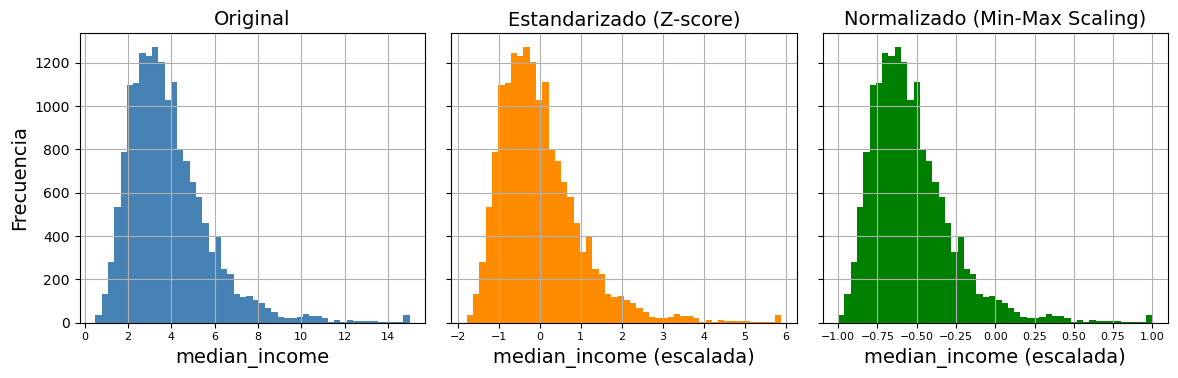

In [199]:
import matplotlib.pyplot as plt

# Crear tres subplots en una sola fila
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# 1. Original
housing_num["median_income"].hist(ax=axs[0], bins=50, color="steelblue")
axs[0].set_title("Original")
axs[0].set_xlabel("median_income")
axs[0].set_ylabel("Frecuencia")

# 2. Estandarizado (Z-score)
housing_num_std_scaled2["median_income"].hist(ax=axs[1], bins=50, color="darkorange")
axs[1].set_title("Estandarizado (Z-score)")
axs[1].set_xlabel("median_income (escalada)")

# 3. Normalizado (Min-Max Scaling)
housing_num_min_max_scaled2["median_income"].hist(ax=axs[2], bins=50, color="green")
axs[2].set_title("Normalizado (Min-Max Scaling)")
axs[2].set_xlabel("median_income (escalada)")

# Ajuste visual
plt.tight_layout()
plt.show()



Estas estandarizaciones no funcionan bien si la variable tiene colas muy pesadas, crean datos que se agruparán en un intervalo muy pequeño. Entonces, antes de escalar la característica debemos transformarla para achicar su cola, y si es posible, hacer _simétrica_ o normalizar su distribución. Esto puede lograrse con varias técnicas:

- Con variables positivas y de colas pesadas a la derecha: reemplazar la variable con su raíz cuadrada o elevarla a una potencia entre cero y 1.

- Si la variable tiene una cola muy larga y muy pesada, se puede sacar el logaritmo de la variable, como hacemos a continuación:

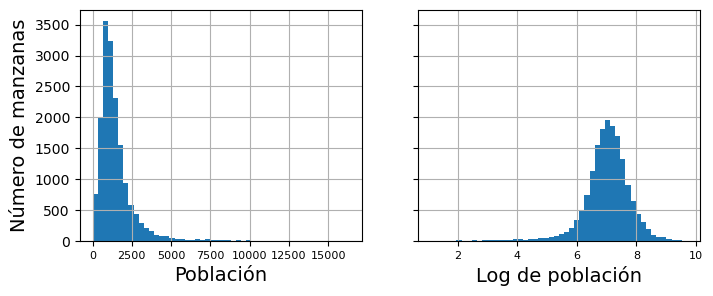

In [201]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Población")
axs[1].set_xlabel("Log de población")
axs[0].set_ylabel("Número de manzanas")
plt.show()

Pueden existir distribuciones _bimodales_ que también necesitan un tratamiento antes de ser incorporadas a un modelo de Machine Learning como la que se muestra a continuación:

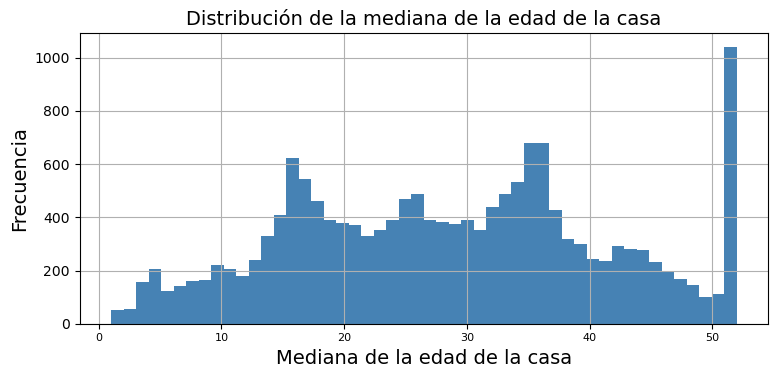

In [203]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

housing["housing_median_age"].hist(ax=axs, bins=50, color="steelblue")

axs.set_xlabel("Mediana de la edad de la casa")
axs.set_ylabel("Frecuencia")
axs.set_title("Distribución de la mediana de la edad de la casa")

plt.tight_layout()
plt.show()

Una solución a esto llama **discretización** o **bucketizing** o **binning** y consiste en crear una variable categórica ordinal a partir de una variable que tenga o colas muy largas o distribuciones muy asimétricas.

**Ejemplo:** Si la edad de una casa va de cero a 50 años, se podrían crear cuatro "buckets":

1. Bucket 1: 0-10 años.
2. Bucket 1: 11-20 años.
3. Bucket 1: 21-30 años.
4. Bucket 1: 31-40 años.
5. Bucket 1: Mayor a 40 años.

Entonces, si una casa tiene 35 años, en la nueva variable tendría un valor de 4.

Esto contribuye a:

1. Hace la distribución más uniforme, evitando que valores extremos dominen el modelo.
2. Facilita el modelado de relaciones no lineales.

Otra opción: si la variable tiene varios picos, como en el gráfico anterior, se puede tratar cada "bucket" como una categoría y codificarla con `OneHotEncoder`, para que el modelo aprenda reglas distintas para cada rango.

Esto no lo vamos a profundizar, pero es otra forma de tratar con variables con distribución bimodal, se llama _Radial Basis Function_ (RBF) `rbf_kernel`, es una forma de medir que tan parecidos son dos valores.

In [206]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

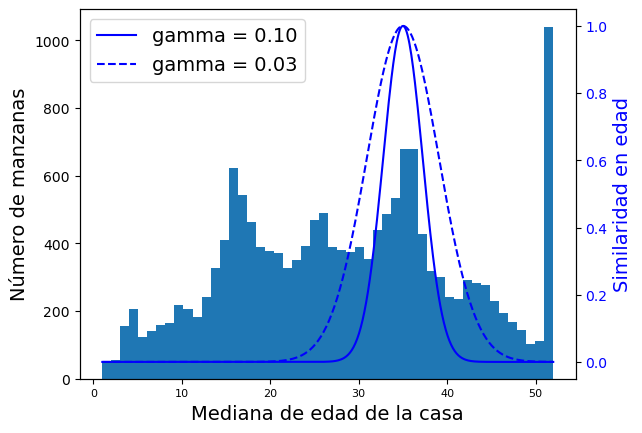

In [207]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Mediana de edad de la casa")
ax1.set_ylabel("Número de manzanas")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Similaridad en edad", color=color)

plt.legend(loc="upper left")
plt.show()

A veces quizás querramos escalar las **variables objetivo**, quizá su distribución tiene también colas pesadas. Entonces podemoss transformarlas en su logaritmo. Pero esto altera la interpretación, porque el modelo predecirá el algoritmo del valor promedio de la casa, no el valor promedio de la casa. Entonces, para volver a la interpretación original tendríamos que elevar estos logaritmos a la exponencial.

**Pensemos en la interpretación del modelo original y un modelo con logaritmo**

Otra vez, Scikit-Learn nos ofrece una opción para "detransformar" las variables:  `inverse_transform()`. Por ejemplo:

In [209]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Antes habíamos creado la varable housing_label que tenía una copia de los datos de valor medio de la casa.

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

some_new_data = housing[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)

predictions = target_scaler.inverse_transform(scaled_predictions)

Miremos las predicciones escaladas:

In [211]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

Hagamos la "detransformación":

In [213]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

Examinemos que tan bien predice el modelo con respecto a los datos reales:

In [215]:
housing_labels.iloc[:5]

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

**¿Predice bien? ¿Sí o no? ¿Por qué?**

Como siempre, hay una forma más simple de hacerlo con `Scikit-learn` y es `TransformedTargetRegressor`

In [217]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [218]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

#### Transformadores personalizados (custom transformers):

__¿Qué es un transformer?:__ un objeto que toma datos de entrada y devuelve datos transformados, usualmente creados por el o la investigadora. Aunque Scikit-Learn contiene transformadores útiles, que se implementan con el comando `FunctionTransformer`.

Por ejemplo, veamos este que aplica una transformación logarítmica a la variable población por manzana:

In [220]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

En este otro ejemplo realizamos el RBF para la edad media de la casa:

In [222]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [223]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

Con este transformador y usando una función de suavizado RBF creamos una variable que indica que tan cerca está cada punto del centro de San Francisco:

In [225]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [226]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

A continuación se presenta una forma de crear un transformador propio, es decir un código que permita preprocesar de forma automática los datos. Este aprenderá sobre los datos y usará este conocimiento para transformar nuevos datos. En este caso, pasamos de transformaciones simples con `FunctionTransformer` a unas más complejas con `fit()` y `transform()`:

In [228]:

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  
        self.with_mean = with_mean
        
# Creamos una clase llamada StandardScalerLike.
# BaseEstimator: permite que funcione dentro de GridSearchCV, Pipeline, etc.
# TransformerMixin: le da el método fit_transform() automáticamente.
# Esto inicia el transformador: crea un parámetro llamado with_mean , 
# que indica si se debe restar la media antes de dividir por la desviación estándar.

    def fit(self, X, y=None): 
        X = check_array(X)  
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  
        return self  

# El transformador aprende las características estadísticas del conjunto de datos X:
# Valida que X sea correcto: no tenga datos mal formados.
# Calcula: la media, la desviación estándar y guarda el número de columnas de X (para el ingreso de nuevos datos).
# Guarda todo esto en la variable self, para usarlo posteriormente.

    def transform(self, X):
        check_is_fitted(self) 
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

# Con esta línea se transforman nuevos datos.

Un transformador puede usar otros estimadores en su implementación. En este ejemplo, no se preocupen por el método, lo veremos más adelante. Creamos un transformador que identifica los principales cluster de los datos y después usa el método RBF para crear una variable que indique que tan similar es cada observación al centro de cada clúster:

In [230]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [231]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [232]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

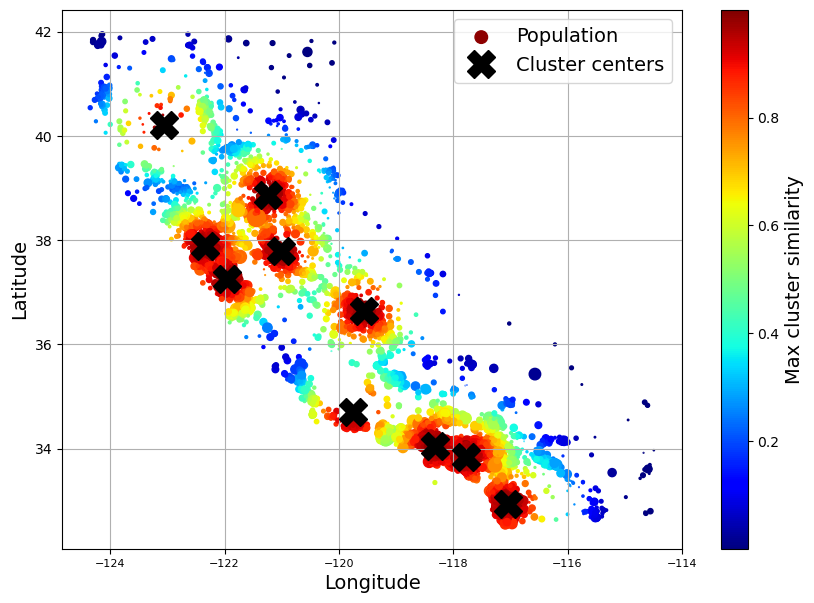

In [233]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

#### Flujo de trabajo (Pipeline) de transformación:

Como vimos, antes de aplicar un modelo de Machine Learning, los datos pueden requerir muchas transformaciones y en un orden específico. Scikit-Learn nos proporciona la función `Pipeline` que nos permite hacer estas transformaciones secuenciales. 

Un _Pipeline_ es una forma de encadenar múltiples pasos de procesamiento en una secuencia ordenada. Evita que se pierdan datos, permite programar de forma más organizada y facilita la validación cruzada.

Miremos un ejemplo con las variables numéricas:

In [235]:
import sklearn

sklearn.set_config(display="diagram")

In [236]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [237]:
# Datos de ejemplo con valores faltantes
X_num = np.array([
    [1.0, 10.0],
    [2.0, np.nan],
    [np.nan, 30.0],
    [4.0, 40.0],
    [5.0, 50.0]
])

print(X_num)

[[ 1. 10.]
 [ 2. nan]
 [nan 30.]
 [ 4. 40.]
 [ 5. 50.]]


In [238]:
# Crear y usar el pipeline
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

# Aplicar transformaciones
X_processed = num_pipeline.fit_transform(X_num)
print(X_processed)

[[-1.41421356 -1.73369023]
 [-0.70710678  0.15075567]
 [ 0.         -0.22613351]
 [ 0.70710678  0.52764485]
 [ 1.41421356  1.28142321]]


Si queremos ver la secuencia del pipeline como un diagrama:

Nosotros le pusimos nombre al transformador, pero esto no es necesario, podemos usar la función `make_pipeline()`:

In [241]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

Miremos ahora nuestro _pipeline_ en acción, aplicándolo a la base housing_num y mostrando las dos primeras filas:

In [243]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [244]:
housing_num[:2].round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.10
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.09


In [245]:
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

Lo convertimos en **Data Frame:**

In [247]:
df_housing_num_prepared = pd.DataFrame(
housing_num_prepared,
columns=num_pipeline.get_feature_names_out(),
index=housing_num.index)

In [248]:
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


Miremos que hizo nuestro pipeline:

In [250]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

**¿Qué tal si queremos un transformador que se ocupe de todas las columnas, numéricas y categóricas de una sola vez?**

Podemos usar la función `ColumnTransformer` de Scikit-Learn, esto aplicará el _num_pipeline_ que definimos previamente a los atributos numéricos, y otro pipeline _cat_pipeline_ a los atributos categóricos:

In [252]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

Si además de esto quiero simplificar el código aún más y no tener que específicar las columnas numéricas y categóricas:

In [254]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [255]:
# Verificar selección
num_selector = make_column_selector(dtype_include=np.number)
cat_selector = make_column_selector(dtype_include=object)

print("Columnas numéricas:", num_selector(housing))
print("Columnas categóricas:", cat_selector(housing))

Columnas numéricas: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Columnas categóricas: ['ocean_proximity']


Ahora estamos listos para aplicar estas transformaciones a la base de datos de entrenamiento housing:

In [257]:
housing_prepared = preprocessing.fit_transform(housing)

In [258]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


**¡Excelente!** Nos tomamos dos clases y ochocientas líneas de código para llegar a esto: realizar las transformaciones de la base de datos en una línea de código sencilla. 

### Simplificando: Construyamos un pipeline que haga todo esto en una sola celda:

- Los valores faltantes en las características numéricas se imputarán reemplazándolos por la mediana, ya que la mayoría de los algoritmos de aprendizaje automático no esperan valores faltantes. En cuanto a la característica categórica, cualquier valor faltante se reemplazará por la categoría más frecuente.

- La característica categórica se codificará one-hot, ya que la mayoría de los algoritmos de aprendizaje automático solo aceptan entradas numéricas.

- Se calcularán y añadirán algunas características de proporción: proporción de dormitorios, habitaciones por casa y personas por casa. Se espera que estas se correlacionen mejor con el valor medio de la vivienda y, por lo tanto, beneficien a los modelos de aprendizaje automático.

- También se añadirán algunas características de similitud de conglomerados. Estas probablemente serán más útiles para el modelo que la latitud y la longitud.

- Las características con una cola larga se reemplazarán por su logaritmo, ya que la mayoría de los modelos prefieren características con distribuciones aproximadamente uniformes o gaussianas.
Todas las características numéricas se estandarizarán, ya que la mayoría de los algoritmos de aprendizaje automático prefieren que todas las características tengan aproximadamente la misma escala.

In [261]:
# Función para crear ratios:

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] 

# Pipeline de ratio:

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

# Pipeline de transformación logarítmica:

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

# Similaridad geográfica:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler()) # Pipeline por default (tratamiento de missing)
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)), # Tratamiento de variables categóricas.
    ],
    remainder=default_num_pipeline) # Aplicar el trataminto de missing.  Sólo en edad promedio de la casa.

In [262]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [263]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


In [264]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

Con esta base transformada podremos entrenar nuestro modelo de ML ... al fin.

### ¿Cómo entrenar a tu modelo de ML?

#### Entrenando y evaluando en la base de entrenamiento:

In [267]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [268]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016A87845160>)])),
                ('linearregression', LinearRegression())])

Como tenemos activado el diagrama, nos muestra la secuencia de lo que realizó. Podemos cambiarla así:

In [270]:
sklearn.set_config(display="text")  # Cambiar a formato texto

In [271]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                    

In [272]:
sklearn.set_config()

In [273]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                    

In [274]:
sklearn.set_config(display="diagram")

In [275]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016A87845160>)])),
                ('linearregression', LinearRegression())])

Ahora, miremos que tan bien predijo este modelo. A continuación se muestran los valores predichos para el precio promedio de la casa e inmediatamente los valores reales para el precio promedio de la casa.

In [277]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  

array([242800., 375900., 127500.,  99400., 324600.])

In [278]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

Miremos por cuanto se equivocó la predicción:

In [280]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-47.0%, -22.3%, 25.4%, 3.4%, -10.3%


Recordemos que elegimos el **RMSE** como nuestro indicador de desempelño del modelo, podemos verlo con la función _mean_squared_error()_ del módulo Scikit-Learn:

In [282]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False) # squared debe ser False.

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68647.95686706662

Aunque es mejor que nada, nuestro modelo no tiene una gran capacidad predictiva. Usualmente subestima el precio de las casas.

<details>
<summary><b>¿Por qué puede pasar esto?</b></summary>

1. Las variables no son suficientes para explicar el precio de la casa o hacer buenas predicciones.
   
2. Nuestro modelo no es lo suficientemente bueno.


</details>

Intentemos con un Árbol de Decisión `DecisionTreeRegressor` ya que es un modelo más complejo, capaz de hallar relaciones no lineales en los datos:

In [285]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016A87845160>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [286]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

Si el objeto del modelo es minimizar el RMSE, ¿que podemos interpretar del que obtuvimos para el árbol de decisión?: **0.5 en seguimiento**

¿Cómo podemos estar seguros de eso? Necesitamos evaluar el modelo ... **¿Cómo se evalúa el modelo?** 

Necesitamos hacerlo entonces en un subconjunto del modelo de entrenamiento. Scikit-Learn nos permite hacer esto con una técnica llamada *K-fold cross-validation* `cross_val_score`.

El siguiente código divide aleatoriamente el conjunto de entrenamiento en 10 subconjuntos no superpuestos, llamados pliegues. Luego, entrena y evalúa el modelo de árbol de decisión 10 veces, seleccionando un pliegue diferente para la evaluación cada vez y utilizando los otros 9 pliegues para el entrenamiento. El resultado es una matriz que contiene las 10 puntuaciones de evaluación.

In [289]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [290]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

Mirando el RMSE no parece que el Árbol de Decisión ajuste bien, de hecho, ajusta de manera tan pobre como la regresión lineal que hicimos al comienzo.

In [292]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69847.923224
std       4078.407329
min      65659.761079
25%      68088.799156
50%      68697.591463
75%      69800.966364
max      80685.254832
dtype: float64

Miremos otro modelo llamado Random Forest `RandomForestRegressor`. 

Este método funciona entrenando numerosos Árboles de Decisión con subconjuntos aleatorios de las características y promediando sus predicciones. Estos modelos, compuestos por muchos otros modelos, se denominan conjuntos: son capaces de mejorar el rendimiento del modelo subyacente (en este caso, los Árboles de Decisión).

Puede tomar unos minuos en correr:

**Se demora varios minutos en ejecutar**

In [295]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [296]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

Comparemos este RMSE (el de validación cruzada) con el del conjunto de entrenamiento (error de entrenamiento):

**Se demora varios minutos en ejecutar**

In [299]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17547.52124624957

El error de entrenamiento es mucho menor que el error de validación, lo que suele indicar que el modelo se ha sobreajustado al conjunto de entrenamiento. Otra posible explicación podría ser que exista una discrepancia entre los datos de entrenamiento y los de validación, pero no es el caso en este caso, ya que ambos provienen del mismo conjunto de datos que mezclamos y dividimos en dos partes.

Hay muchos otros modelos que podemos probar como los Support Vector Machines, sin preocuparse mucho por los hiperparámetros, el objetivo es probar siempre entre dos a cinco modelos prometedores.

## Fine-tuning (perfecccionando) el modelo:

Asumamos que ya tenemos unos cuantos modelos prometedores identificados, ahora miremos como podemos perfeccionarlos:

### Búsqueda en cuadrícula (Grid search):

Una opción sería modificar manualmente los hiperparámetros hasta encontrar la combinación ideal de valores. Esto sería un trabajo muy tedioso y no tenemos tiempo para explorar muchas combinaciones. Para evitar esto, Scikit-Learn desarrolló `GridSearchCV`.

Con este comando indicamos que hiperparámetros desea experimentar y qué valores probar, y el usará la validación cruzada para evaluar todas las combinaciones posibles de valores de hiperparámetros. Por ejemplo, el siguiente código busca la mejor combinación de valores de hiperparámetros para el RandomForestRegressor:

**Se demora varios minutos en ejecutar**

In [304]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000016A87845160>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

El código anterior tiene 2 _diccionarios_. En el primero realizará **X** combinaciones de **n_clusters** y **max_features**. En el segundo diccionario realizará **Y** combinaciones de hiperparámetros. En total evaluará **X + Y** combinaciones de hiperparámetros ... después entrenará 3 pipelines por combianación (validación cruzada de 3 pliegues) ... entonces va entrenar **3 * (X+Y)** modelos ... entendiblemente se demorará un rato.

Pero nos permite obtener la mejor combinación de parámetros:

In [306]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

Entonces, en este ejemplo el mejor modelo lo obtenemos al ajustar el número de clusters (*n_clusters*) a 15 y el número máximo de característias (*max_features*) a 6. Al mejor estimador disponible accedemos con el sguiente código:

In [308]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000016...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016A87816ED0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Comprobemos los resultados de las evaluaciones en los mejores modelos entrenados:

In [310]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43536,43753,44569,43953
13,15,8,44084,44205,44863,44384
14,15,10,44368,44496,45200,44688
7,10,6,44251,44628,45857,44912
9,10,6,44251,44628,45857,44912


El RMSE para el mejor modelo es de **43.953**, mucho mejor que los otros resultados.

### Búsqueda aleatoria:

El método anterior sirve cuando se tienen pocas combianaciones. Pero cuando se tienen muchas combinaciones, es mejor usar `RandomizedSearchCV`, especialmente cuando hay un gran conjunto de hiperparámetros. Esta clase se puede usar de forma muy similar a la clase *GridSearchCV*, pero en lugar de probar todas las combinaciones posibles, evalúa un número fijo de combinaciones y selecciona un valor aleatorio para cada hiperparámetro en cada iteración.

Algunas ventajas son:

- Si algunos de tus hiperparámetros son continuos (o discretos, pero con muchos valores posibles), y ejecutas una búsqueda aleatoria durante, digamos, 1000 iteraciones, explorará 1000 valores diferentes para cada uno de estos hiperparámetros, mientras que la búsqueda en cuadrícula solo exploraría los pocos valores que indicaste para cada uno.

- Supongamos que un hiperparámetro no influye mucho, pero aún no lo sabes. Si tiene 10 valores posibles, lo añades a tu búsqueda en cuadrícula, el entrenamiento tardará 10 veces más. Pero si lo añades a una búsqueda aleatoria, no influirá en nada.

- Supongamos que hay 6 hiperparámetros para explorar, cada uno con 10 valores posibles; la búsqueda en cuadrícula no ofrece otra opción que entrenar el modelo un millón de veces, mientras que la búsqueda aleatoria siempre puede ejecutarse durante cualquier número de iteraciones que elijas.

Para cada hiperparámetro, debe proporcionar una lista de valores posibles o una distribución de probabilidad:


In [313]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Entrenará 30 modelos (*n_inter* x *cv*):

**Se demora varios minutos en ejecutar**

In [316]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A854FEBA0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A86109A30>},
                   random_state=42, scoring='neg_root_mean_squared_error')

Hay otros métodos de búsqueda de hiperparámetros: `HalvingRandomSearchCV` y `HalvingGridSearchCV`que no exploraremos aquí.

### Ensemble methods (métodos de conjunto):

Otra forma de ajustar el sistema es intentar combinar los modelos con mejor rendimiento. El grupo (o "conjunto") a menudo tendrá un mejor rendimiento que el mejor modelo individual, al igual que los bosques aleatorios tienen un mejor rendimiento que los árboles de decisión individuales en los que se basan, especialmente si los modelos individuales cometen errores muy diferentes.

## Analizar el mejor modelo y sus errores:

La finalidad de un modelo de Machine Learning es predecir, no interpretar parámetros asociados a los atributos. Sin embargo, inspeccionar los mejores modelos nos ofrece perspectivas acerca de la importancia relativa de cada atributo en la predicción.

In [320]:
final_model = rnd_search.best_estimator_  
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [321]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.19234364612672789, 'log__median_income'),
 (0.07643709476448396, 'cat__ocean_proximity_INLAND'),
 (0.0650352691209638, 'bedrooms__ratio'),
 (0.05549970022834359, 'rooms_per_house__ratio'),
 (0.048138515308740734, 'people_per_house__ratio'),
 (0.035961262692298664, 'geo__Cluster 3 similarity'),
 (0.025324811164172775, 'geo__Cluster 22 similarity'),
 (0.022135725960477252, 'geo__Cluster 6 similarity'),
 (0.022122145871171783, 'geo__Cluster 17 similarity'),
 (0.018070857482773945, 'geo__Cluster 2 similarity'),
 (0.01766604492008499, 'geo__Cluster 32 similarity'),
 (0.01685222023873265, 'geo__Cluster 18 similarity'),
 (0.014891074224474443, 'geo__Cluster 7 similarity'),
 (0.014477873989140293, 'geo__Cluster 43 similarity'),
 (0.014398636979858279, 'geo__Cluster 21 similarity'),
 (0.013649746413983962, 'geo__Cluster 40 similarity'),
 (0.013638021303871461, 'geo__Cluster 38 similarity'),
 (0.013331070971939203, 'geo__Cluster 41 similarity'),
 (0.013206364581236142, 'geo__Cluster 34 simil

Esto nos puede llevar a considerar eliminar algunos de los atributos menos útiles para realizar predicciones. Scikit-Learn tiene un comando `sklearn.feature_selection.SelectFromModel` que hace esto de forma automática.

Otros análisis que podríamos hacer es crear subconjuntos de datos y evaluar por ejemplo:

- ¿Qué tal predice en barrios con menores ingresos? ¿Con mayores ingresos?
- ¿Qué tal predice en la zona urbana? ¿En la zona rural?
- ¿Qué tal predice en el norte? ¿En el sur?

Si encontramos predicciones pobres para algunos de estos grupos, entonces necesitamos realizar mayores ajustes al modelo antes de afirmar que puede predecir sobre nueva información.

## Evaluemos el sistema que obtuvimos en el conjunto de datos de prueba:

Tras ajustar los modelos, finalmente tendremos un sistema con un rendimiento suficientemente bueno. Estamos listos (¡Al fin!) para evaluar el modelo final en el conjunto de pruebas. Este proceso no tiene nada de especial; es obtener los predictores y las etiquetas de su conjunto de prueba, ejecutar el comando `final_model` para transformar los datos y hacer predicciones, y luego evaluarlas:

In [324]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41385.520595938855


In [325]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [326]:
rmse_lower, rmse_upper

(39455.13724373799, 43646.3862745992)

In [327]:
# El mejor score del Randomized Search

mejor_score = rnd_search.best_score_
# Toca convertirlo siempre a RMSE positivo:
rmse_positivo = -mejor_score
print(f"Mejor RMSE RSCV: {rmse_positivo:.2f}")
# Ejemplo: "Mejor RMSE: 45000.32"

Mejor RMSE RSCV: 41981.07


Por último, miremos como predice:

In [329]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [330]:
import joblib

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]
predictions = final_model_reloaded.predict(new_data)

In [331]:
predictions

array([444600.16, 456126.09, 107952.  ,  97931.  , 333295.02])

In [332]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [333]:
error_ratios2 = predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios2]))

-3.0%, -5.7%, 6.2%, 1.9%, -7.9%
